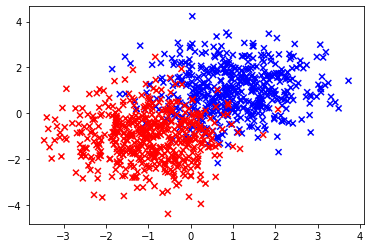

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



def gen_data(num_pos: int,
             num_neg: int,
             mean_pos: np.ndarray = np.asarray(([[1], [1]])),
             sigma_pos: np.ndarray = np.eye(2),
             mean_neg: np.ndarray = np.asarray(([[-1], [-1]])),
             sigma_neg: np.ndarray = np.eye(2)) -> (np.ndarray, np.ndarray):
    """
    Generates synthetic data

    :param num_pos: Number of positive examples
    :param num_neg: Number of negative examples
    :param mean_pos: (num_features, 1) Mean vector for positive class
    :param sigma_pos: (num_features, num_features) Covariance matrix for positive class
    :param mean_neg: (num_features, 1) Mean vector for negative class
    :param sigma_neg: (num_features, num_features) Covariance matrix for negative class

    :return features: (num_pos + num_neg, num_features) Feature matrix
    :return labels: (num_pos + num_neg, 1) Binary label matrix
    """
    assert type(sigma_pos) == np.ndarray and type(sigma_neg) == np.ndarray, 'Incorrect type of sigma_pos or sigma_neg'
    assert len(sigma_pos.shape) == 2 and sigma_pos.shape[0] == sigma_pos.shape[1], 'Incorrect sigma_pos shape'
    assert len(sigma_neg.shape) == 2 and sigma_neg.shape[0] == sigma_neg.shape[1], 'Incorrect sigma_neg shape'
    assert sigma_pos.shape[0] == sigma_neg.shape[0], 'Shapes of sigma_pos and sigma_neg do not match'
    assert type(mean_pos) == np.ndarray and type(mean_neg) == np.ndarray, 'Incorrect type of mean_pos or mean_neg'
    assert len(mean_pos.shape) == 2 and mean_pos.shape[0] == sigma_pos.shape[0] and mean_pos.shape[1] == 1, \
        'Incorrect dimension for mean_pos'
    assert len(mean_neg.shape) == 2 and mean_neg.shape[0] == sigma_neg.shape[0] and mean_neg.shape[1] == 1, \
        'Incorrect dimension for mean_neg'

    # Dimension of the feature vectors
    num_features = sigma_pos.shape[0]

    # Initialize the features and labels
    features = np.zeros(shape=(num_pos + num_neg, num_features))
    labels = np.zeros(shape=(num_pos + num_neg, 1))
    X_class1=np.random.multivariate_normal(mean_pos[:,0],sigma_pos,num_pos)
    y_class1=np.array([1]*num_pos)
    X_class2=np.random.multivariate_normal(mean_neg[:,0],sigma_neg,num_neg)
    y_class2=np.array([0]*num_neg)
    features=np.concatenate((X_class1,X_class2),axis=0)
    labels=np.concatenate((y_class1,y_class2),axis=0)
    # print(labels)
    labels=np.reshape(labels,(num_pos + num_neg,1))
  
    assert features.shape[0] == num_pos + num_neg and features.shape[1] == num_features, 'Incorrect features shape'
    assert labels.shape[0] == num_pos + num_neg and labels.shape[1] == 1, 'Incorrect labels shape'
    assert features.shape[0] == labels.shape[0], 'Dimension mismatch between features and labels'

    return features, labels


def plot_data(features: np.ndarray,
              labels: np.ndarray,
              filename: str = 'fig.png') -> None:
    """
    Plots the data as a scatter plot and colors the examples based on their class membership

    :param features: (num_examples, 2) Feature matrix. Input data must have two features.
    :param labels: (num_examples, 1) Binary label matrix
    :param filename: Name of output file
    """
    assert type(features) == np.ndarray and len(features.shape) == 2 and features.shape[1] == 2, \
        'Incorrect dimensions or type for features matrix'
    assert type(labels) == np.ndarray and len(labels.shape) == 2 and labels.shape[1] == 1, \
        'Incorrect dimensions or type for labels vector'
    assert features.shape[0] == labels.shape[0], 'Dimension mismatch between features and labels'
    assert type(filename) == str and filename.endswith('.png'), 'Incorrect file name. Only .png supported'

    color=[]
    # plt.scatter(features[:,0],features[:,1],c=labels,color=color,marker="x",lw=0)
    for i in range(labels.shape[0]):
      if(labels[i][0]==1):
        color.append("blue")
      else:
        color.append("red")
    plt.scatter(features[:,0],features[:,1],c=color,marker="x")


if __name__ == '__main__':

    mean1=np.asarray([[[1], [1]]])
    sigma1=np.array ([[1,0],[0,1]])
    mean2=np.asarray(([[-1], [-1]]))
    sigma2=np.array ([[1,0],[0,1]])
    X,y=gen_data(num_pos=500,
             num_neg=500)
    
    # Generate data and plot
    plot_data(X,y)

    # ------------------------------------------ #


In [ ]:
import numpy as np


class LogisticRegression:

    def __init__(self,
                 num_features: int,
                 pos_weight: float = 1.0,
                 neg_weight: float = 1.0,
                 reg_param: float = 0.0):
        """
        :param num_features: Number of features in the dataset
        :param pos_weight: Weight assigned to positive examples in the cost function
        :param neg_weight: Weight assigned to negative examples in the cost function
        :param reg_param: Regularization parameter
        """
        assert num_features > 0 and pos_weight > 0 and neg_weight > 0 and reg_param >= 0, \
            'All inputs must be non-negative'

        self.num_features = num_features
        self.pos_weight = pos_weight
        self.neg_weight = neg_weight
        self.reg_param = reg_param

        # ------------ Insert code here ------------ #
        self.w=np.random.normal(size = (self.num_features, 1))
        self.b=0
        # Initialize self.w, which is a (num_features, 1) dimensional vector
        # Initialize self.b, which is a scalar

        # ------------------------------------------ #

    @staticmethod
    def sigmoid(x: np.ndarray) -> np.ndarray:
        """
        Compute the sigmoid of x element-by-element

        :param x: A scalar, vector, or matrix

        :return output: An output of the same dimension as x with sigmoid function applied to each element
        """
        output = x
        output = 1 / (1 + np.exp(-x))

        return output

    def binary_cross_entropy(self,
                             predictions: np.ndarray,
                             labels: np.ndarray) -> float:
        """
        Compute the binary cross entropy loss for the provided predictions and labels

        :param predictions: (num_examples, 1) Probabilities computed by the model
        :param labels: (num_examples, 1) Binary ground-truth labels

        :return loss: Binary cross entropy
        """
        assert type(predictions) == np.ndarray and type(labels) == np.ndarray, 'Incorrect type of labels or predictions'
        assert len(predictions.shape) == 2 and predictions.shape[1] == 1, 'Incorrect dimension for predictions'
        assert len(labels.shape) == 2 and labels.shape[1] == 1, 'Incorrect dimension for labels'
        assert predictions.shape[1] == labels.shape[1], 'Number of examples in labels and predictions do not match'

        loss = self.pos_weight * 0.0 + self.neg_weight * 0.0

        for i in range(labels.shape[0]):
          loss=loss+self.pos_weight*labels[i][0]*np.log(predictions[i][0])+self.neg_weight*(1-labels[i][0])*np.log(1-predictions[i][0])
        loss=-loss/labels.shape[0]

        return loss

    def predict(self,
                features: np.ndarray) -> np.ndarray:
        """
        Compute the model output (probability values) for the given features

        :param features: (num_examples, num_features) Feature matrix

        :return predictions: (num_examples, 1) Prediction (probabilities) computed by model
        """
        predictions = np.zeros((features.shape[0], 1))

        
        predictions= self.sigmoid(np.matmul(features, self.w) + self.b)
    
        return predictions

    def fit(self,
            features: np.ndarray,
            labels: np.ndarray,
            learning_rate: float = 0.01,
            max_steps: int = 1000) -> list:
        """
        Train the logistic regression model to update self.w and self.b

        :param features: (num_examples, num_features) Feature matrix
        :param labels: (num_examples, 1) Ground-truth binary labels
        :param learning_rate: Learning rate use for gradient descent
        :param max_steps: Maximum number of steps for which gradient descent must be run

        :return costs: List containing the value of loss function at each step
        """
        assert type(features) == np.ndarray and len(features.shape) == 2, \
            'Incorrect dimension or type for features matrix'
        assert type(labels) == np.ndarray and len(labels.shape) == 2 and labels.shape[1] == 1, \
            'Incorrect dimension or type for label vector'
        assert features.shape[0] == labels.shape[0], 'Number of examples in features and labels do not match'
        assert learning_rate > 0, 'Learning rate must be positive'
        assert max_steps > 0, 'Maximum number of steps must be positive'

        costs = []

        for iter_idx in range(max_steps):

          predictions = self.predict(features)
          # print("prediction :",predictions.shape)
          t=[]  
          for i in range(predictions.shape[0]):
            t.append(predictions[i][0]*labels[i][0])
          t=np.array(t).reshape((predictions.shape[0],1))
          
          t=np.reshape(t,(predictions.shape[0],1))
          costs.append(self.binary_cross_entropy(predictions,labels))
          e=(-self.pos_weight*labels+(self.pos_weight-self.neg_weight)*t +self.neg_weight*predictions)
          grad_w = (np.matmul(features.T, e) + self.reg_param * self.w) / features.shape[0]
          grad_b = np.mean((-self.pos_weight*predictions+(self.pos_weight-self.neg_weight)*t +self.neg_weight*labels))
          self.w = self.w - learning_rate * grad_w
          self.b = self.b - learning_rate * grad_b

          if np.linalg.norm(grad_w) + np.linalg.norm(grad_b) <= 0.001:
            break

        return costs


if __name__ == '__main__':

    X,y=gen_data(num_pos=500,num_neg=500)
    log=LogisticRegression(2)
    cost=log.fit(X,y)

    #accuracy

    train_preds = log.predict(X) >= 0.5
    train_accuracy=(train_preds == y).mean()
    print(" train accuracy",train_accuracy)
    
    


 train accuracy 0.918


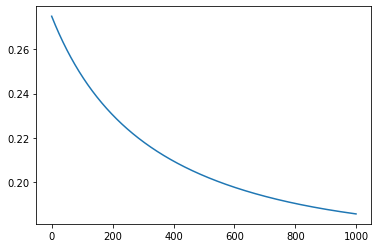

In [ ]:
plt.plot(cost)

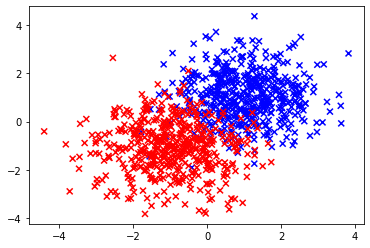

In [ ]:
# print(cost)
# plt.plot(cost)
plot_data(X,train_preds)